In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import mpl_toolkits
import seaborn as sns

%matplotlib inline

In [2]:
datafile3 = pd.read_csv('loan.csv')
logicdataset = datafile3.fillna(0)

In [3]:
status = [1 if values == 'Y' else 0 for values in logicdataset.Loan_Status] 
logicdataset['Loan_Status'] = status

#educationstatus = [1 if values == 'Graduate' else 0 for values in logicdataset.Education]
#logicdataset['Education'] = educationstatus


In [4]:
logicdataset.Loan_Status.unique()

array([1, 0], dtype=int64)

In [5]:
logicdataset.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.113043,0.524872,0.000083,0.001500,-0.029803
CoapplicantIncome,-0.113043,1.000000,0.213266,-0.021310,-0.035240,-0.025384
LoanAmount,0.524872,0.213266,1.000000,0.019654,-0.036075,-0.027538
Loan_Amount_Term,0.000083,-0.021310,0.019654,1.000000,0.049682,-0.007271
Credit_History,0.001500,-0.035240,-0.036075,0.049682,1.000000,0.414237
Loan_Status,-0.029803,-0.025384,-0.027538,-0.007271,0.414237,1.000000


The relationship is not so significant

In [6]:
logicdataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,1


**CROSS VALIDATION**

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


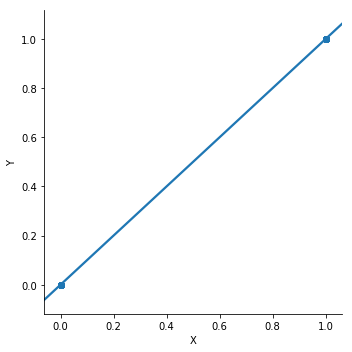

Accuracy of logistic regression classifier on test set: 0.78


In [24]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
X = logicdataset[['Credit_History','Loan_Amount_Term','LoanAmount']]
y = logicdataset[['Loan_Status']]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)


logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
t_data=pd.DataFrame()
t_data['X'] = X_test['Credit_History']
t_data['Y'] = y_pred
sns.lmplot(x='X', y='Y', data=t_data, ci=None)
plt.show()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

TRAIN: [1527 1528 1529 ..., 3050 3051 3052] TEST: [   0    1    2 ..., 1524 1525 1526]
TRAIN: [   0    1    2 ..., 1524 1525 1526] TEST: [1527 1528 1529 ..., 3050 3051 3052]
[1 1 1 1 1]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


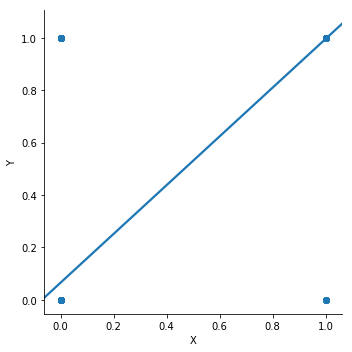

0.753604193971


In [31]:
from sklearn.model_selection import KFold as kf

X = logicdataset[['Credit_History','Loan_Amount_Term','LoanAmount','ApplicantIncome']]
y = logicdataset[['Loan_Status']]

kfk = kf(n_splits=2)
kfk.get_n_splits(X)

for train_index, test_index in kfk.split(X):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
     
logreg = LogisticRegression()
m = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(y_pred[0:5])

t_data=pd.DataFrame()
t_data['X'] = X_test['Credit_History']
t_data['Y'] = y_pred
sns.lmplot(x='X', y='Y', data=t_data, ci=None)
plt.show()
print(m.score(X_test,y_test))

Looking at the two graphs, we can say that the model doesnt do well with cross validation since the accuracy score falls down.
The data cannot work or not able to product max accuracy on arbitrary points.

[[140 159]
 [ 56 561]]


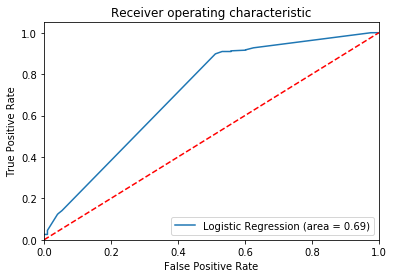

             precision    recall  f1-score   support

          0       0.71      0.47      0.57       299
          1       0.78      0.91      0.84       617

avg / total       0.76      0.77      0.75       916



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#Split dependent and Independent variables


VIF = pd.DataFrame()
VIF["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
VIF["Features"] = X.columns

print(VIF.round(1))

   VIF Factor          Features
0         4.0    Credit_History
1         5.6  Loan_Amount_Term
2         4.6        LoanAmount
3         2.4   ApplicantIncome


In [33]:
np.exp(logreg.coef_)

array([[ 6.2660748 ,  0.99818059,  1.00022803,  0.9999708 ]])

Assumptions for logistic regressions to be true and not violated

Assumptions for logistic regression: 
    1) The require dependent variable is binary in nature hence the first assumption is satisfied 
    2) the observations are independent of each other as calculated from the VIF factor 
    3) The multi colinearity is checked by the .corr function and the vif factor using which we can decide that the columns are not highly corelated (<6)
    4) the log odd values calculated above are linear to the independent variables in the df 
    5) the data set is pretty large as there are 3093 rows .. calculated above the given formula that 500(10*3/0.1) for 3 independent variables